In [5]:
import numpy as np

from ipywidgets import Image

from ipywidgets import ColorPicker, IntSlider, link, AppLayout, HBox

from ipycanvas import MultiCanvas, hold_canvas

import matplotlib.pyplot as plt

import math

import imageio

In [6]:
width = 900
height = 300

In [7]:
def make_c(N):
    C = np.zeros( (N, N) )
    for u in range(N):
        for v in range(N):
            if(u==0):
                C[u][v] = math.sqrt(1/float(N))
            else:
                C[u][v] = math.sqrt(2/float(N)) * math.cos( ((2*v + 1) * math.pi * u) / (2* float(N)) )
    return C

def transformar_imagem(imagem, C):
    return np.dot(np.dot(C, imagem), C.transpose())

def inverter_imagem(imagem, C):
    return np.dot(np.dot(C.transpose(), imagem), C)

def desenhar():
    global background_layer
    image_2 = Image.from_file('gato_dct_temp.jpg')
    image_3 = Image.from_file('gato_convertido_temp.jpg')

    background_layer.draw_image(image_2, 300, 0, 300, 300)
    background_layer.draw_image(image_3, 600, 0, 300, 300)

def transformar():
    global dct_arr
    global im_size
    imageio.imwrite('gato_dct_temp.jpg', embelezar_imagem(dct_arr) )
    convertido = inverter_imagem(dct_arr, make_c(im_size))
    imageio.imwrite('gato_convertido_temp.jpg', convertido)
    desenhar()

def resetar():
    global dct_arr
    im = imageio.imread('gato_cortado.jpg')
    dct_arr = transformar_imagem(im, make_c(im_size))
    

# colocar entre 0 e 255
def embelezar_imagem(imagem):
    imagem = imagem.copy()
    for ix, line in enumerate(imagem):
        for ix_2, pixel in enumerate(line):
                imagem[ix][ix_2] = min(255, max(imagem[ix][ix_2], 0) )
    return imagem
    
im_size = 450
dct_arr = np.zeros( (im_size, im_size) )


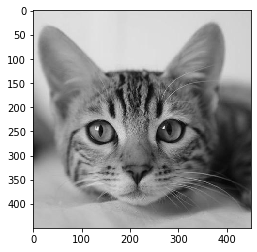

In [8]:
im = imageio.imread('gato_cortado.jpg')

C = make_c(450)
im = transformar_imagem(im, C)

im = inverter_imagem(im, C)
imgplot = plt.imshow(im, cmap='gray', vmin=0, vmax=255)


# imageio.imwrite('gato_cortado.jpg', tx_sh_ct)





In [40]:
canvas = MultiCanvas(3, size=(width, height))

image = Image.from_file('gato_cortado.jpg')


teste = []


background_layer = canvas[0]
drawing_layer = canvas[1]
interaction_layer = canvas[2]

drawing = False
start = None

def draw_line(canvas, start, end):
    return 
def on_mouse_down(x, y):
    global drawing
    global start
    global image

    if(x >= 300 and x <= 600):
        x -= 300
        dct_arr[int( x) ][ int(y)] = 0
        teste.append( (x, y) )
        transformar()
        
def on_mouse_move(x, y):
    return
interaction_layer.on_mouse_down(on_mouse_down)
interaction_layer.on_mouse_move(on_mouse_move)



drawing_layer.stroke_style = '#749cb8'
drawing_layer.line_width = 3
interaction_layer.stroke_style = '#749cb8'
interaction_layer.line_width = 3

picker = ColorPicker(description='Color:', value='#749cb8')
slider = IntSlider(description='Line width:', value=3, min=1, max=20)

link((picker, 'value'), (drawing_layer, 'stroke_style'))
link((picker, 'value'), (interaction_layer, 'stroke_style'))
link((slider, 'value'), (drawing_layer, 'line_width'))
link((slider, 'value'), (interaction_layer, 'line_width'))

resetar()
transformar()

AppLayout(center=canvas, footer=HBox((picker, slider)))

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [-8.881784197001252e-15, 255.0000000000028]. Convert image to uint8 prior to saving to suppress this warning.


AppLayout(children=(HBox(children=(ColorPicker(value='#749cb8', description='Color:'), IntSlider(value=3, desc…

In [34]:
dct_arr[0:3][0:3]

array([[ 6.31098444e+04,  8.59218372e+03, -1.49153060e+03, ...,
         1.54164232e+00,  1.39193282e+00, -4.97718212e+00],
       [ 1.01676822e+04, -5.43632298e+03, -2.67081265e+02, ...,
         1.02924738e+00,  5.88087786e-01,  7.48186202e-01],
       [ 1.45734209e+04, -1.56466256e+03, -6.98274326e+02, ...,
        -8.69887832e-01, -3.48247975e+00,  4.11539721e-01]])

In [41]:
teste

[(4.90625, 17.09375), (4.90625, 17.09375), (4.90625, 17.09375)]